## Pet Finder Competition

https://www.kaggle.com/competitions/petfinder-adoption-prediction

In [14]:
import pandas as pd

##############################################################
# Lectura de dataset
##############################################################

# Dataset directory
ruta_dataset = "../../../petfinder_dataset/"

# Dataset
file_path = ruta_dataset + 'test/test.csv'
df = pd.read_csv(file_path)

df.head(1)


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,2,Dopey & Grey,8,266,266,1,2,6,7,1,...,2,1,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.0


In [12]:
# Breed labels
breed_path = ruta_dataset + "BreedLabels.csv"
df_breeds = pd.read_csv(breed_path)

df_breeds.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [21]:
# Tamaño del dataset
print(df.shape)     # 3972 registros, 23 variables

# Name of columns
print(df.columns)

(3972, 23)
Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt'],
      dtype='object')
Campos faltantes por variable:
Name           414
Description      1
dtype: int64


In [24]:
# Missing values per variable

# Cambio variables no especificadas (ejemplo: 0) a NA
df['MaturitySize'] = df['MaturitySize'].replace(0, pd.NA)
df['FurLength'] = df['FurLength'].replace(0, pd.NA)
df['Vaccinated'] = df['Vaccinated'].replace(3, pd.NA)
df['Dewormed'] = df['Dewormed'].replace(3, pd.NA)
df['Sterilized'] = df['Sterilized'].replace(3, pd.NA)
df['Health'] = df['Health'].replace(0, pd.NA)

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Campos faltantes por variable:")
print(missing_values)

Campos faltantes por variable:
Name           414
Vaccinated     487
Dewormed       436
Sterilized     524
Description      1
dtype: int64


In [23]:
# Dataset summary
print(df.describe())

              Type          Age       Breed1       Breed2       Gender  \
count  3972.000000  3972.000000  3972.000000  3972.000000  3972.000000   
mean      1.471299    11.290534   263.628651    66.110775     1.769889   
std       0.499238    17.497150    60.241316   118.167713     0.688737   
min       1.000000     0.000000     2.000000     0.000000     1.000000   
25%       1.000000     2.000000   265.000000     0.000000     1.000000   
50%       1.000000     4.000000   266.000000     0.000000     2.000000   
75%       2.000000    12.000000   307.000000    45.250000     2.000000   
max       2.000000   156.000000   307.000000   307.000000     3.000000   

            Color1       Color2       Color3  MaturitySize    FurLength  \
count  3972.000000  3972.000000  3972.000000   3972.000000  3972.000000   
mean      2.261581     3.277946     1.903575      1.848691     1.450655   
std       1.785615     2.745439     2.974756      0.553386     0.601209   
min       1.000000     0.000000  

### Variables Base
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

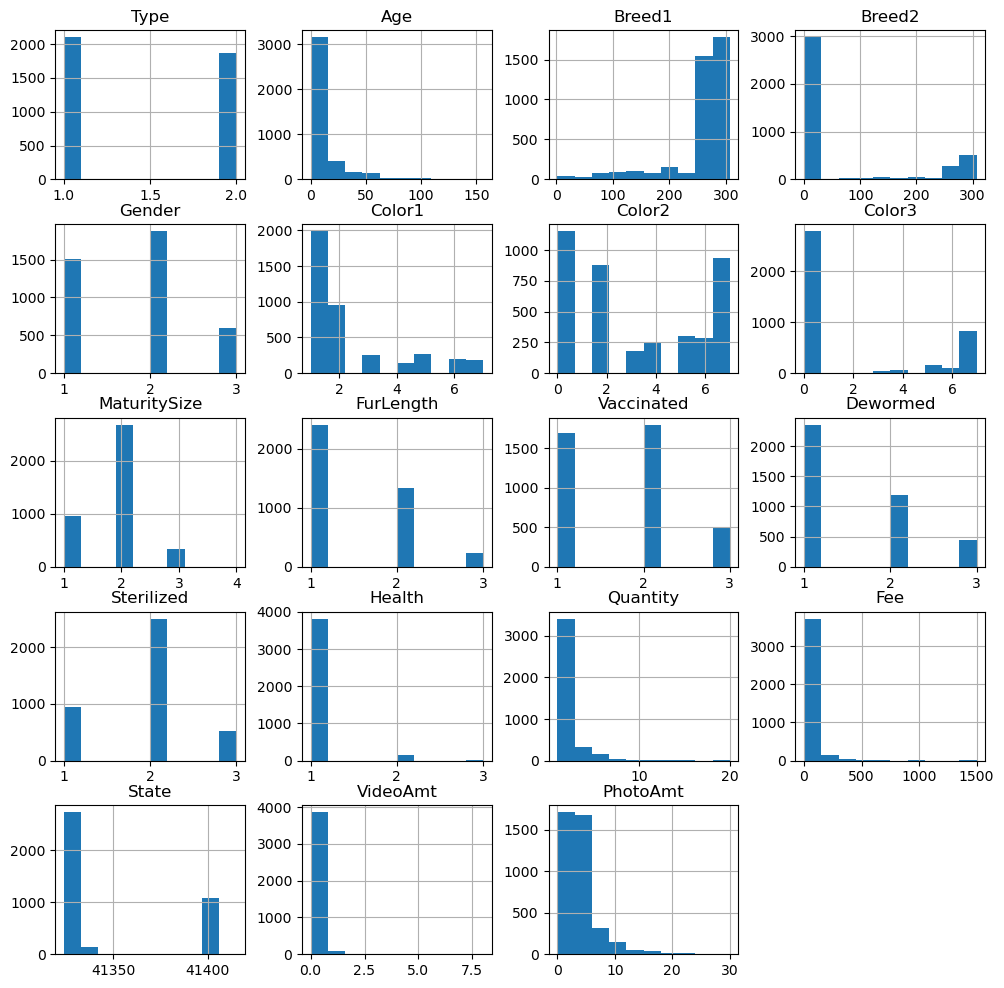

In [5]:
# Variables histograms

import matplotlib.pyplot as plt

df.hist(figsize=(12, 12))
plt.show()

In [7]:
# Pets of mixed breed (Breed1 = 307)
count = df[df['Breed1'] == 307].shape[0]
print(count)    # 1499

# Las 10 razas mas comunes (Breed1)
breed_counts = df['Breed1'].value_counts()
most_common_breeds = breed_counts.nlargest(10)
print(most_common_breeds)
#most_common_breeds_names = df_breeds[df_breeds['BreedID'].isin(most_common_breeds.index)]['BreedName']
#for breed, count in zip(most_common_breeds_names, most_common_breeds):
#    print(f"{breed}: {count}")

# Las 10 razas mas comunes (Breed2)
breed2_counts = df['Breed2'].value_counts()
most_common_breeds2 = breed2_counts.nlargest(10)
print(most_common_breeds2)



1499
Breed1
307    1499
266    1026
265     365
285      78
264      71
205      63
299      63
141      54
179      53
292      47
Name: count, dtype: int64
Breed2
0      2967
307     387
266     144
265      72
285      42
264      34
141      33
299      28
292      20
218      18
Name: count, dtype: int64
